In [1]:
pip install tensorflow opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from collections import Counter

# Define paths
data_dir = 'asl_alphabet_train'
img_size = 64
categories = sorted(os.listdir(data_dir))  # A-Z + space, del, nothing

print("Found classes:", categories)
print(f"Total classes: {len(categories)}")

# Check if dataset has correct structure
for category in categories:
    class_path = os.path.join(data_dir, category)
    num_files = len(os.listdir(class_path))
    print(f"Class '{category}' has {num_files} images")

# Prepare data
data = []
labels = []

for idx, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    print(f"Loading class '{category}'...")
    for img_file in os.listdir(path)[:3000]:  # Limit per class for consistency
        try:
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(idx)
        except Exception as e:
            print(f"Error loading image {img_file}: {e}")

# Convert to numpy arrays
data = np.array(data).reshape(-1, img_size, img_size, 1)
labels = to_categorical(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)

# Optional: Print label distribution
print("\nLabel distribution in training set:", Counter(np.argmax(y_train, axis=1)))
print("Label distribution in test set:  ", Counter(np.argmax(y_test, axis=1)))

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Optional: Use data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)

datagen.fit(X_train)

# Train model
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
                    epochs=15,
                    validation_data=(X_test, y_test))

# Save model and labels
model.save('asl_model.h5')
np.save('labels.npy', categories)

print("✅ Model and labels saved successfully.")

Found classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Total classes: 29
Class 'A' has 3000 images
Class 'B' has 3000 images
Class 'C' has 3000 images
Class 'D' has 3000 images
Class 'E' has 3000 images
Class 'F' has 3000 images
Class 'G' has 3000 images
Class 'H' has 3000 images
Class 'I' has 3000 images
Class 'J' has 3000 images
Class 'K' has 3000 images
Class 'L' has 3000 images
Class 'M' has 3000 images
Class 'N' has 3000 images
Class 'O' has 3000 images
Class 'P' has 3000 images
Class 'Q' has 3000 images
Class 'R' has 3000 images
Class 'S' has 3000 images
Class 'T' has 3000 images
Class 'U' has 3000 images
Class 'V' has 3000 images
Class 'W' has 3000 images
Class 'X' has 3000 images
Class 'Y' has 3000 images
Class 'Z' has 3000 images
Class 'del' has 3000 images
Class 'nothing' has 3000 images
Class 'space' has 3000 images
Loading class 'A'...
Loading class 'B'...
L

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 149s 134ms/step - accuracy: 0.0328 - loss: 4.5461 - val_accuracy: 0.0371 - val_loss: 3.3653
Epoch 2/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 142s 131ms/step - accuracy: 0.0342 - loss: 3.3667 - val_accuracy: 0.0350 - val_loss: 3.3663
Epoch 3/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 147s 135ms/step - accuracy: 0.0361 - loss: 3.3662 - val_accuracy: 0.0360 - val_loss: 3.3635
Epoch 4/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 144s 133ms/step - accuracy: 0.0356 - loss: 3.3621 - val_accuracy: 0.0615 - val_loss: 3.3001
Epoch 5/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 139s 128ms/step - accuracy: 0.0479 - loss: 3.3272 - val_accuracy: 0.0919 - val_loss: 3.1880
Epoch 6/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 129s 118ms/step - accuracy: 0.0706 - loss: 3.2485 - val_accuracy: 0.2138 - val_loss: 2.7874
Epoch 7/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 108s 99ms/step - accuracy: 0.1624 - loss: 2.8901 - val_accuracy: 0.5096 - val_loss: 1.7803
Epoch 8/15
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 109s 101ms/step - acc

✅ Model and labels saved successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Predicted Letter: H
Confidence: 0.07


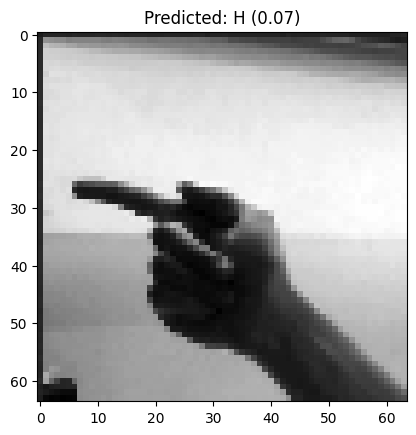

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model and labels
model = load_model('asl_model.h5')
labels = np.load('labels.npy')

# Load and preprocess test image
image_path = 'H_test.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64)) / 255.0
img_input = img.reshape(1, 64, 64, 1)

# Predict
prediction = model.predict(img_input)
predicted_idx = np.argmax(prediction)
confidence = np.max(prediction)
print(f"Predicted Letter: {labels[predicted_idx]}")
print(f"Confidence: {confidence:.2f}")

# Visualize prediction
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {labels[predicted_idx]} ({confidence:.2f})")
plt.show()

In [24]:
pip install mediapipe


[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Letter: H
Confidence: 0.06


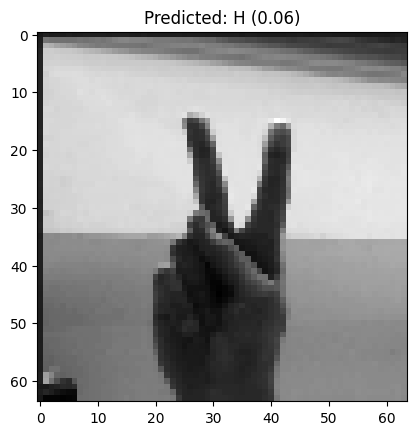

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model and labels
model = load_model('asl_model.h5')
labels = np.load('labels.npy')

# Load and preprocess test image
image_path = 'asl_alphabet_test/H_test.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64)) / 255.0
img_input = img.reshape(1, 64, 64, 1)

# Predict
prediction = model.predict(img_input)
predicted_idx = np.argmax(prediction)
confidence = np.max(prediction)
print(f"Predicted Letter: {labels[predicted_idx]}")
print(f"Confidence: {confidence:.2f}")

# Visualize prediction
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {labels[predicted_idx]} ({confidence:.2f})")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted Letter: H
Confidence: 0.06


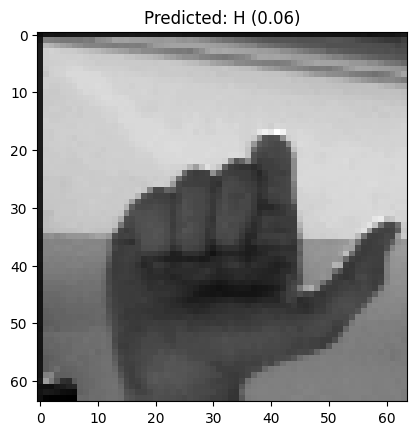

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load model and labels
model = load_model('asl_model.h5')
labels = np.load('labels.npy')

# Load and preprocess test image
image_path = 'asl_alphabet_test/T_test.jpg'
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64)) / 255.0
img_input = img.reshape(1, 64, 64, 1)

# Predict
prediction = model.predict(img_input)
predicted_idx = np.argmax(prediction)
confidence = np.max(prediction)
print(f"Predicted Letter: {labels[predicted_idx]}")
print(f"Confidence: {confidence:.2f}")

# Visualize prediction
plt.imshow(img, cmap='gray')
plt.title(f"Predicted: {labels[predicted_idx]} ({confidence:.2f})")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Predicted Letter: G
Confidence: 0.07


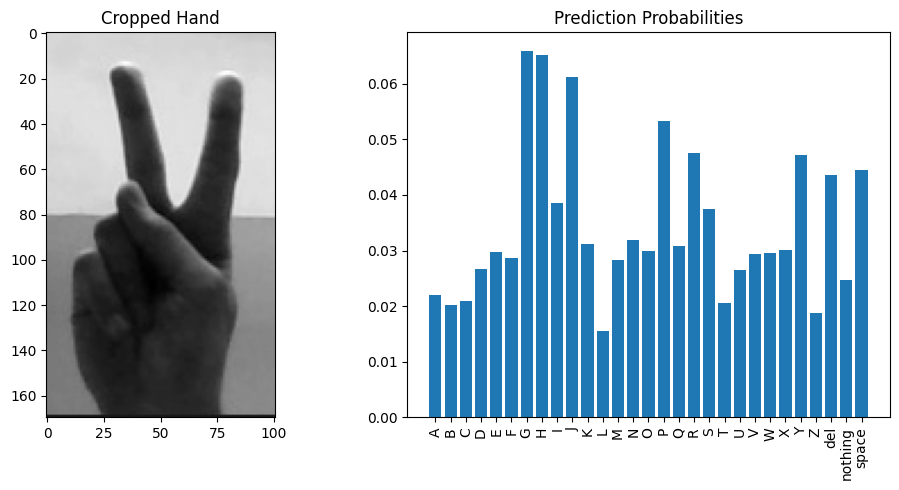

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import mediapipe as mp

# Load model and labels
model = load_model('asl_model.h5')
labels = np.load('labels.npy')

# Initialize MediaPipe
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

# Load image
image_path = 'asl_alphabet_test/K_test.jpg'
img = cv2.imread(image_path)
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Detect hand
results = hands.process(rgb_img)

if results.multi_hand_landmarks:
    # Crop hand region
    x_coords = [lm.x for lm in results.multi_hand_landmarks[0].landmark]
    y_coords = [lm.y for lm in results.multi_hand_landmarks[0].landmark]
    x_min, x_max = int(min(x_coords)*img.shape[1]), int(max(x_coords)*img.shape[1])
    y_min, y_max = int(min(y_coords)*img.shape[0]), int(max(y_coords)*img.shape[0])

    padding = 20
    hand_img = img[y_min-padding:y_max+padding, x_min-padding:x_max+padding]

    # Preprocess
    gray = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (64, 64)) / 255.0
    input_data = resized.reshape(1, 64, 64, 1)

    # Predict
    prediction = model.predict(input_data)
    predicted_idx = np.argmax(prediction)
    confidence = np.max(prediction)

    print(f"Predicted Letter: {labels[predicted_idx]}")
    print(f"Confidence: {confidence:.2f}")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray, cmap='gray')
    plt.title("Cropped Hand")

    plt.subplot(1, 2, 2)
    plt.bar(labels, prediction[0])
    plt.xticks(rotation=90)
    plt.title("Prediction Probabilities")
    plt.tight_layout()
    plt.show()

else:
    print("No hand detected.")

In [29]:
# train_model_tl.py

import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define paths
data_dir = 'asl_alphabet_train'
img_size = 64
categories = sorted(os.listdir(data_dir))
print("Found classes:", categories)

# Load data
data = []
labels = []

for idx, category in enumerate(categories):
    path = os.path.join(data_dir, category)
    print(f"Loading class '{category}'...")
    for img_file in os.listdir(path)[:3000]:  # limit per class
        try:
            img_path = os.path.join(path, img_file)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(idx)
        except Exception as e:
            print(f"Error loading {img_file}: {e}")

# Convert to numpy arrays
data = np.array(data).reshape(-1, img_size, img_size, 1)
labels = to_categorical(labels)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, stratify=labels)

# Convert grayscale to RGB
X_train_3ch = np.repeat(X_train, 3, axis=-1)
X_test_3ch = np.repeat(X_test, 3, axis=-1)

# Load MobileNet base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False  # Freeze feature extractor

# Add custom head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(len(categories), activation='softmax')(x)

model = Model(base_model.input, output)
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint('best_asl_mobilenet.h5', save_best_only=True)
]

# Train
history = model.fit(X_train_3ch, y_train,
                    validation_data=(X_test_3ch, y_test),
                    epochs=15,
                    batch_size=32,
                    callbacks=callbacks)

# Save final model and labels
model.save('asl_mobilenet_final.h5')
np.save('labels.npy', categories)
print("✅ Model and labels saved successfully.")

Found classes: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
Loading class 'A'...
Loading class 'B'...
Loading class 'C'...
Loading class 'D'...
Loading class 'E'...
Loading class 'F'...
Loading class 'G'...
Loading class 'H'...
Loading class 'I'...
Loading class 'J'...
Loading class 'K'...
Loading class 'L'...
Loading class 'M'...
Loading class 'N'...
Loading class 'O'...
Loading class 'P'...
Loading class 'Q'...
Loading class 'R'...
Loading class 'S'...
Loading class 'T'...
Loading class 'U'...
Loading class 'V'...
Loading class 'W'...
Loading class 'X'...
Loading class 'Y'...
Loading class 'Z'...
Loading class 'del'...
Loading class 'nothing'...
Loading class 'space'...


C:\Users\PMLS\AppData\Local\Temp\ipykernel_13896\2782710129.py:50: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 15s 2us/step
Epoch 1/15
2174/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2387 - loss: 2.7101

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 126s 56ms/step - accuracy: 0.2388 - loss: 2.7097 - val_accuracy: 0.4581 - val_loss: 1.8671
Epoch 2/15
2174/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.4907 - loss: 1.7520

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 119s 55ms/step - accuracy: 0.4908 - loss: 1.7520 - val_accuracy: 0.5397 - val_loss: 1.5643
Epoch 3/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5642 - loss: 1.4852

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 119s 55ms/step - accuracy: 0.5642 - loss: 1.4852 - val_accuracy: 0.5803 - val_loss: 1.4049
Epoch 4/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6050 - loss: 1.3344

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 122s 56ms/step - accuracy: 0.6050 - loss: 1.3344 - val_accuracy: 0.5997 - val_loss: 1.3106
Epoch 5/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6285 - loss: 1.2437

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 122s 56ms/step - accuracy: 0.6285 - loss: 1.2437 - val_accuracy: 0.6280 - val_loss: 1.2290
Epoch 6/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6483 - loss: 1.1649

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 123s 57ms/step - accuracy: 0.6483 - loss: 1.1649 - val_accuracy: 0.6378 - val_loss: 1.1790
Epoch 7/15
2174/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.6681 - loss: 1.1013

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 120s 55ms/step - accuracy: 0.6681 - loss: 1.1013 - val_accuracy: 0.6501 - val_loss: 1.1282
Epoch 8/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.6835 - loss: 1.0500

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 121s 56ms/step - accuracy: 0.6835 - loss: 1.0500 - val_accuracy: 0.6591 - val_loss: 1.0869
Epoch 9/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.6942 - loss: 1.0012

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 116s 53ms/step - accuracy: 0.6942 - loss: 1.0012 - val_accuracy: 0.6676 - val_loss: 1.0702
Epoch 10/15
2174/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7011 - loss: 0.9738

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 118s 54ms/step - accuracy: 0.7011 - loss: 0.9738 - val_accuracy: 0.6793 - val_loss: 1.0308
Epoch 11/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7129 - loss: 0.9420

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 119s 55ms/step - accuracy: 0.7129 - loss: 0.9420 - val_accuracy: 0.6845 - val_loss: 1.0080
Epoch 12/15
2174/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7225 - loss: 0.9113

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 117s 54ms/step - accuracy: 0.7225 - loss: 0.9113 - val_accuracy: 0.6901 - val_loss: 0.9854
Epoch 13/15
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7272 - loss: 0.8901

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 118s 54ms/step - accuracy: 0.7272 - loss: 0.8901 - val_accuracy: 0.6940 - val_loss: 0.9707
Epoch 14/15
2174/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.7309 - loss: 0.8690

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 117s 54ms/step - accuracy: 0.7309 - loss: 0.8690 - val_accuracy: 0.7008 - val_loss: 0.9537
Epoch 15/15
2174/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.7367 - loss: 0.8452

2175/2175 ━━━━━━━━━━━━━━━━━━━━ 141s 53ms/step - accuracy: 0.7368 - loss: 0.8452 - val_accuracy: 0.7025 - val_loss: 0.9393


✅ Model and labels saved successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 684ms/step
Predicted Letter: nothing
Confidence: 0.89


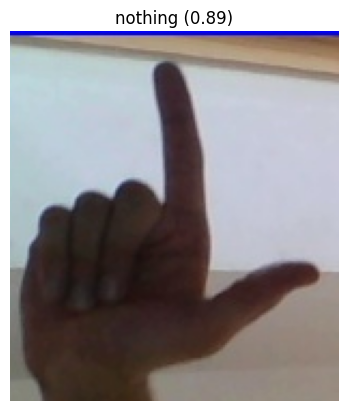

In [34]:
# predict_with_hand_detection.py

import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import mediapipe as mp

# Load model and labels
model = load_model('best_asl_mobilenet.h5')
labels = np.load('labels.npy')

# Initialize MediaPipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(static_image_mode=True, max_num_hands=1)

# Load test image
image_path = 'asl_alphabet_test/L_test.jpg'
img = cv2.imread(image_path)

if img is None:
    raise FileNotFoundError(f"Image not found: {image_path}")

# Detect hand
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = hands.process(rgb_img)

if results.multi_hand_landmarks:
    # Get bounding box
    x_coords = [lm.x for lm in results.multi_hand_landmarks[0].landmark]
    y_coords = [lm.y for lm in results.multi_hand_landmarks[0].landmark]
    x_min = int(min(x_coords) * img.shape[1])
    x_max = int(max(x_coords) * img.shape[1])
    y_min = int(min(y_coords) * img.shape[0])
    y_max = int(max(y_coords) * img.shape[0])

    padding = 20
    x_min = max(0, x_min - padding)
    x_max = min(img.shape[1], x_max + padding)
    y_min = max(0, y_min - padding)
    y_max = min(img.shape[0], y_max + padding)

    # Crop and preprocess
    hand_img = img[y_min:y_max, x_min:x_max]
    gray = cv2.cvtColor(hand_img, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(gray, (64, 64)) / 255.0
    input_data = np.repeat(resized[..., np.newaxis], 3, axis=-1)  # Convert to 3-channel
    input_data = np.expand_dims(input_data, axis=0)

    # Predict
    prediction = model.predict(input_data)
    predicted_idx = np.argmax(prediction)
    confidence = np.max(prediction)

    predicted_letter = labels[predicted_idx]
    threshold = 0.7

    # Show result
    print(f"Predicted Letter: {predicted_letter}")
    print(f"Confidence: {confidence:.2f}")
    plt.imshow(cv2.cvtColor(hand_img, cv2.COLOR_BGR2RGB))
    title = f"{predicted_letter} ({confidence:.2f})" if confidence > threshold else "Not Confident"
    plt.title(title)
    plt.axis('off')
    plt.show()

else:
    print("🛑 No hand detected.")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("No Hand Detected")
    plt.axis('off')
    plt.show()

In [35]:
pip install numpy opencv-python tensorflow matplotlib



[notice] A new release of pip is available: 25.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set paths
train_dir = 'asl_alphabet_train'

# Image preprocessing
img_size = 64
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax')  # 26 letters + 3 extras: 'del', 'nothing', 'space'
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

# Save the model
model.save("asl_model.h5")


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,280,605 (4.89 MB)

 Trainable params: 1,280,605 (4.89 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 788s 362ms/step - accuracy: 0.4814 - loss: 1.7461 - val_accuracy: 0.6663 - val_loss: 1.1352
Epoch 2/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 725s 333ms/step - accuracy: 0.9357 - loss: 0.1916 - val_accuracy: 0.7416 - val_loss: 1.0212
Epoch 3/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 606s 279ms/step - accuracy: 0.9658 - loss: 0.1030 - val_accuracy: 0.7919 - val_loss: 1.1102
Epoch 4/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 760s 349ms/step - accuracy: 0.9747 - loss: 0.0760 - val_accuracy: 0.7809 - val_loss: 1.1343
Epoch 5/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 608s 280ms/step - accuracy: 0.9832 - loss: 0.0489 - val_accuracy: 0.8105 - val_loss: 1.0052
Epoch 6/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 649s 298ms/step - accuracy: 0.9831 - loss: 0.0516 - val_accuracy: 0.8028 - val_loss: 1.0409
Epoch 7/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 521s 240ms/step - accuracy: 0.9877 - loss: 0.0378 - val_accuracy: 0.7903 - val_loss: 0.9402
Epoch 8/10
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 404s 186ms/step - ac

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


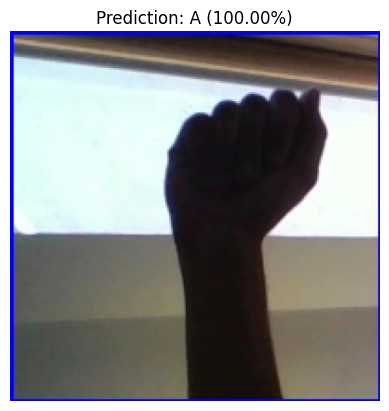

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


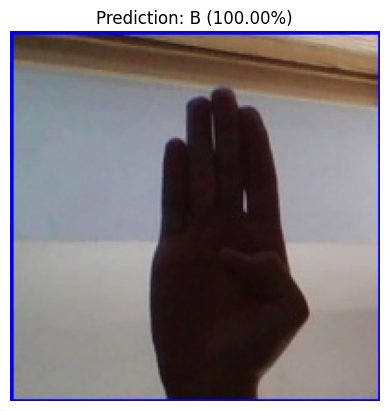

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


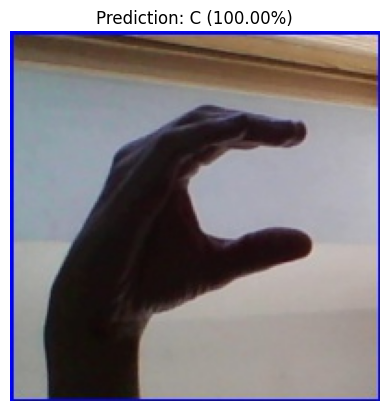

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


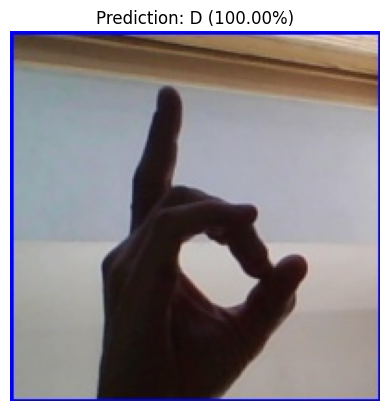

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


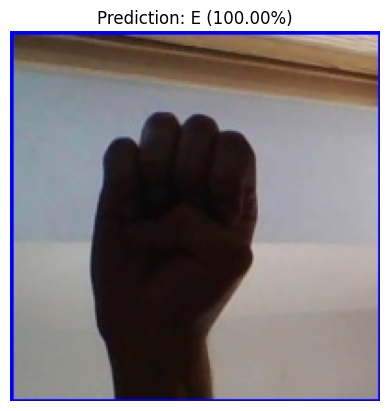

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


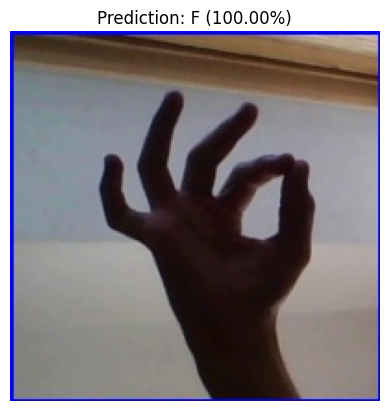

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


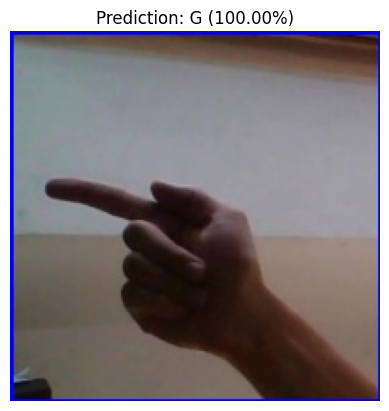

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


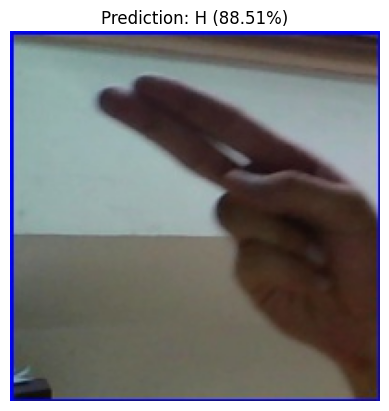

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


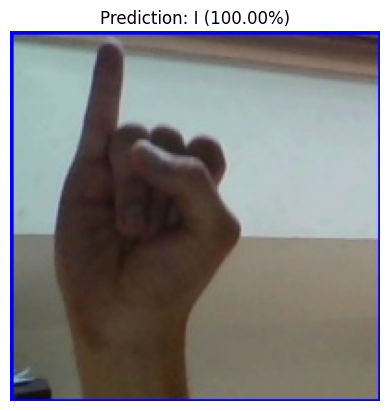

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


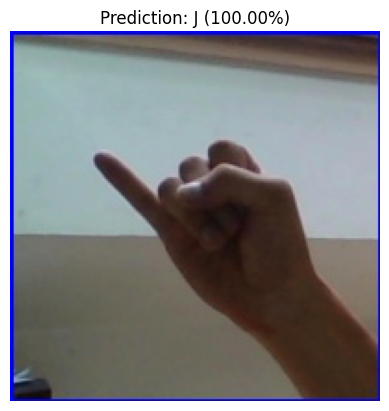

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


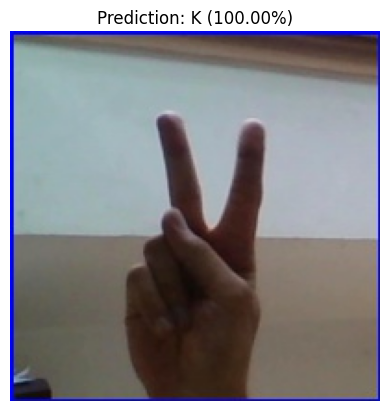

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


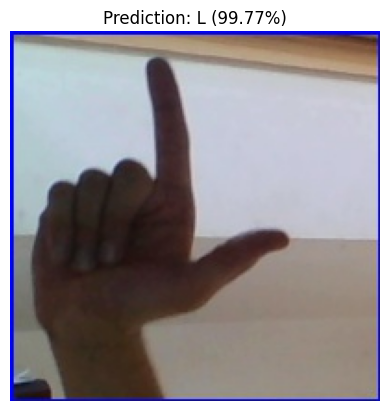

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


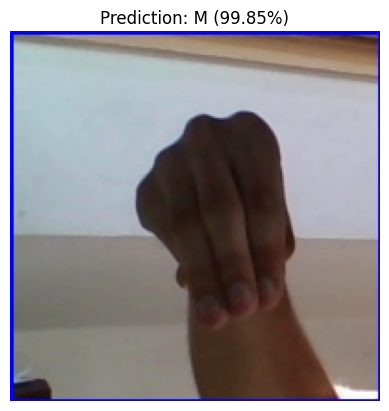

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


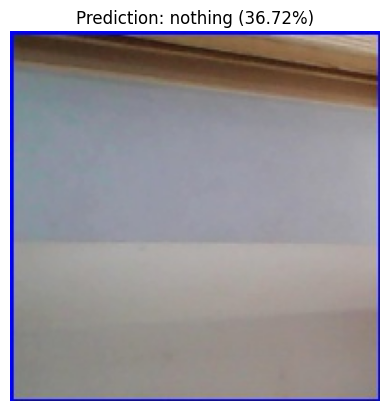

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


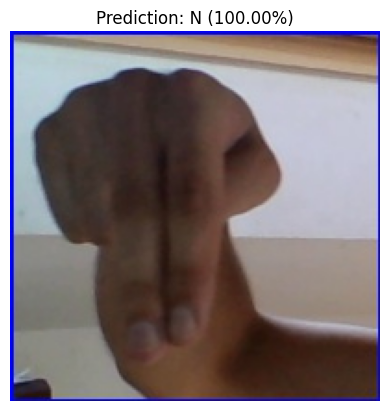

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


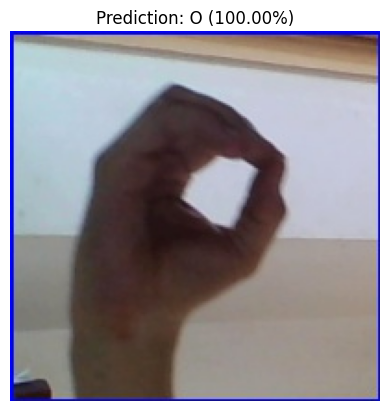

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


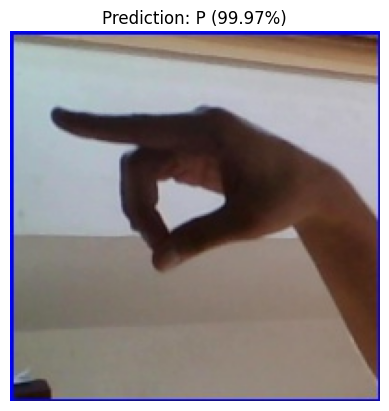

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


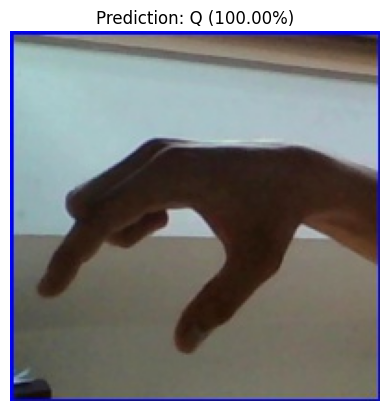

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


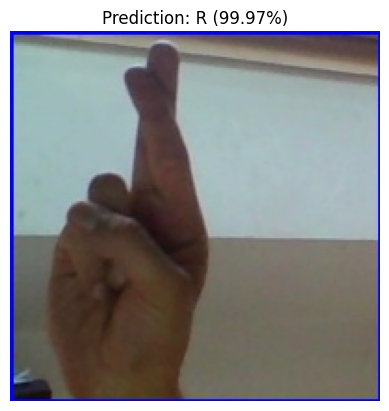

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


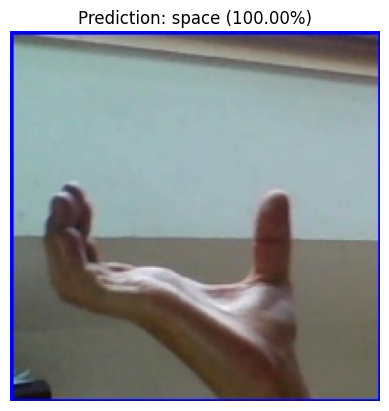

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


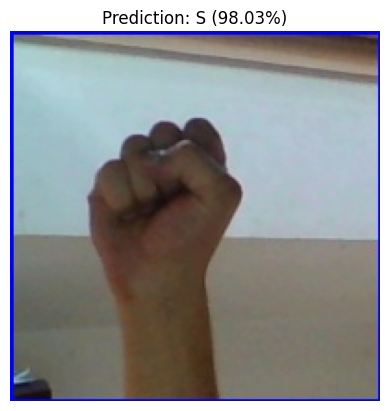

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


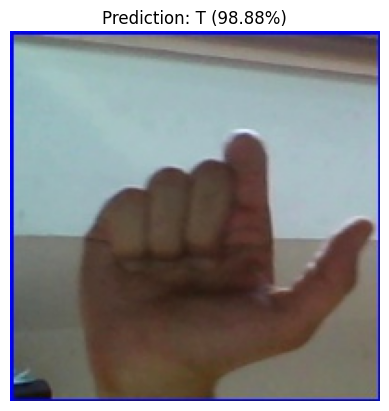

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


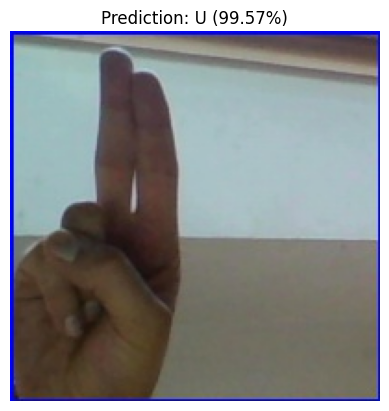

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


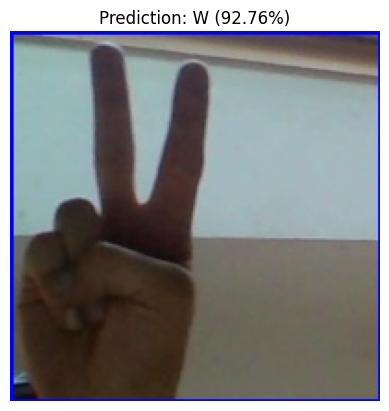

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


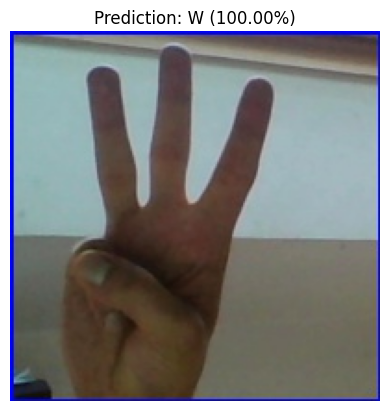

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


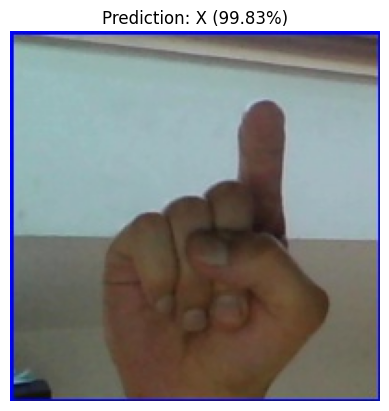

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


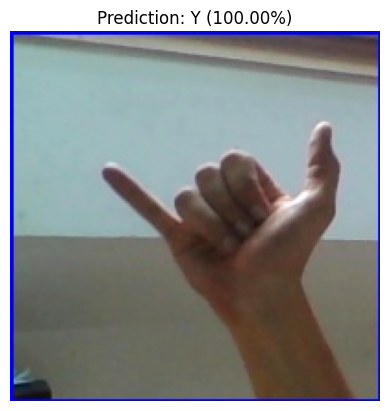

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


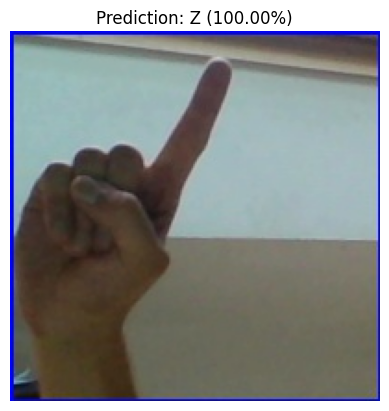

In [42]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('asl_model.h5')

# Label list (26 letters + 3 special classes if used)
labels = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ") + ['del', 'nothing', 'space']

# Image settings
img_size = 64
test_folder = 'asl_alphabet_test'

# Loop through each image in the test folder
for img_name in os.listdir(test_folder):
    img_path = os.path.join(test_folder, img_name)

    # Read and preprocess image
    image = cv2.imread(img_path)
    if image is None:
        print(f"Failed to load {img_name}")
        continue

    image_resized = cv2.resize(image, (img_size, img_size))
    image_normalized = image_resized / 255.0
    image_input = np.expand_dims(image_normalized, axis=0)

    # Predict
    prediction = model.predict(image_input)
    class_idx = np.argmax(prediction)
    class_label = labels[class_idx]
    confidence = prediction[0][class_idx] * 100

    # Display results using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {class_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


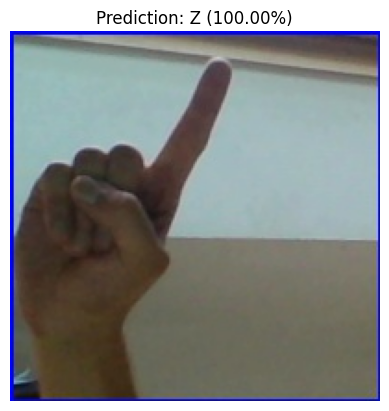

In [43]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('asl_model.h5')

# Label list (26 letters + 3 special classes if used)
labels = list("ABCDEFGHIJKLMNOPQRSTUVWXYZ") + ['del', 'nothing', 'space']

# Image settings
img_size = 64
image_path = 'asl_alphabet_test/Z_test.jpg'  # ✅ Path to a single image

# Read and preprocess image
image = cv2.imread(image_path)
if image is None:
    print(f"Failed to load image: {image_path}")
else:
    image_resized = cv2.resize(image, (img_size, img_size))
    image_normalized = image_resized / 255.0
    image_input = np.expand_dims(image_normalized, axis=0)

    # Predict
    prediction = model.predict(image_input)
    class_idx = np.argmax(prediction)
    class_label = labels[class_idx]
    confidence = prediction[0][class_idx] * 100

    # Display results using matplotlib
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f"Prediction: {class_label} ({confidence:.2f}%)")
    plt.axis('off')
    plt.show()
